<a href="https://colab.research.google.com/github/abuzar01440/AI-agents-/blob/main/chain_of_though.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! pip install langchain_google_genai
! pip install langgraph


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.5 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


In [44]:
import langchain
import langgraph
from langchain import LLMChain, PromptTemplate
from langchain_google_genai import ChatGoogleGenerativeAI

print("Import Done")

Import Done


In [9]:
import getpass
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

Enter your Google AI API key: ··········


In [10]:

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    temperature=0.7,
    max_tokens=312,
    timeout=60,
    max_retries=3
)

In [11]:
# user input
user_query = input("Please enter your prompt here: ")


template_1 = PromptTemplate(
    input_variables=["user_query"],
    template=user_query
)

template_2 = PromptTemplate(
    input_variables=["initial_output"],
    template="Explain the actual intent behind this query: {initial_output}"
)

template_3 = PromptTemplate(
    input_variables=["explained_query"],
    template="Provide a comprehensive answer to: {explained_query}"
)

# Create chains
chain_1 = LLMChain(llm=llm, prompt=template_1)
chain_2 = LLMChain(llm=llm, prompt=template_2)
chain_3 = LLMChain(llm=llm, prompt=template_3)

def chain_of_thought(user_input):
    # Execute with PROPER input formats
    res1 = chain_1.invoke({"user_query": user_input})
    res2 = chain_2.invoke({"initial_output": res1["text"]})
    res3 = chain_3.invoke({"explained_query": res2["text"]})

    return res1["text"], res2["text"], res3["text"]


print(chain_of_thought("Which is semi-supervise and weak supervise learning in machine learning"))

Please enter your prompt here: Which is semi-supervise and weak supervise learning in machine learning
('Semi-supervised learning and weak supervised learning are both approaches to training machine learning models that use less fully labeled data than traditional supervised learning.  However, they differ in *how* they use the limited labeled data:\n\n**Semi-Supervised Learning:**\n\n* **What it is:**  Semi-supervised learning uses a small amount of labeled data alongside a much larger amount of *unlabeled* data to train a model.  The algorithm leverages the structure and patterns in the unlabeled data to improve its performance beyond what could be achieved with the labeled data alone.\n\n* **How it works:**  Various techniques exist, but generally, the algorithm tries to learn a model that both fits the labeled data well and also produces a smooth or consistent decision boundary across the unlabeled data.  This often involves assumptions about the data distribution, such as cluster 

('Semi-supervised learning and weak supervised learning are both approaches to training machine learning models that use less fully labeled data than traditional supervised learning.  However, they differ in *how* they use the limited labeled data:\n\n**Semi-Supervised Learning:**\n\n* **What it is:**  Semi-supervised learning uses a small amount of labeled data alongside a much larger amount of *unlabeled* data to train a model.  The algorithm leverages the structure and patterns in the unlabeled data to improve its performance beyond what could be achieved with the labeled data alone.\n\n* **How it works:**  Various techniques exist, but generally, the algorithm tries to learn a model that both fits the labeled data well and also produces a smooth or consistent decision boundary across the unlabeled data.  This often involves assumptions about the data distribution, such as cluster assumptions (data points close together are likely to have the same label).\n\n* **Example:** Imagine you\'re training a model to classify images of cats and dogs. You have a small set of labeled images (some labeled "cat," some "dog"), but a much larger set of unlabeled images.  A semi-supervised learning algorithm could use the labeled images to learn initial features and then use the unlabeled images to refine those features and improve the decision boundary, effectively learning from the overall structure of the cat and dog images.\n\n\n**Weakly Supervised Learning:**\n\n* **What it is:** Weakly supervised learning uses labeled data that is *imperfect* or *incomplete*.', "The intent of the query is to **clarify the distinction between semi-supervised learning and weakly supervised learning**.  While both aim to address the limitations of fully supervised learning by using less perfect or less abundant labeled data, they do so in fundamentally different ways:\n\n* **Semi-supervised learning** deals with the *quantity* of labeled data, using a small amount of high-quality labels and a large amount of unlabeled data. The focus is on leveraging the structure inherent in the unlabeled data to improve model performance.\n\n* **Weakly supervised learning** deals with the *quality* of labeled data, using a larger amount of labels that are noisy, incomplete, or imprecise.  The focus is on mitigating the impact of these imperfections on the model's learning process.\n\nThe query aims to highlight this crucial difference—one is about the *amount* of good labels, the other is about the *quality* of available labels—to avoid confusion between these two related but distinct approaches to machine learning.  The provided examples further illustrate this distinction.", "The core distinction between semi-supervised learning (SSL) and weakly supervised learning (WSL) lies in their approach to addressing the limitations of fully supervised learning. Both strive to overcome the challenges of limited or imperfect labeled data, but they tackle the problem from opposite angles:  SSL focuses on the *quantity* of labels, while WSL focuses on the *quality*.\n\n**Semi-Supervised Learning (SSL):  Quantity over Quality**\n\nSSL operates with a small amount of high-quality labeled data and a large amount of unlabeled data.  The key idea is to leverage the inherent structure and relationships within the unlabeled data to improve the model's learning.  The unlabeled data provides valuable information about the underlying data distribution, which can help the model generalize better and avoid overfitting to the limited labeled data.  Algorithms used in SSL often employ techniques like:\n\n* **Self-training:**  A model is trained on the labeled data, then used to predict labels for the unlabeled data.  Highly confident predictions are added to the labeled dataset, and the process is iterated.\n* **Co-training:** Multiple models are trained on different views of the data (e.g., using different features), and they iteratively label each other's unlabeled data.\n* **Consistency regularization:**  The model is trained to produce consistent predictions for the same data point under different perturbations (e.g., adding noise to the input).\n* **Generative models:**  These models learn the underlying data distribution from")



# lets built chain of thought using LangGraph

In [45]:
import langgraph
from typing import TypedDict, Annotated, List
from langgraph.graph import StateGraph, START, END, add_messages
import uuid
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage, AIMessage
from langchain_core.prompts import ChatPromptTemplate



In [46]:
class AgentState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

# 2. Define your prompt templates separately
explain_prompt = ChatPromptTemplate.from_template(
    """Explain the following user query in a simple way:

    {user_query}"""
)

answer_prompt = ChatPromptTemplate.from_template(
    """Based on the following explanation, provide a formal and detailed answer:

    {explained_query}"""
)


# 3. Define the graph nodes
def explain_query_node(state: AgentState):
    # Get the last message (the user query)
    last_message = state['messages'][-1]
    prompt = explain_prompt.format(user_query=last_message.content)
    response = llm.invoke(prompt)
    return {"messages": [response]}

def final_answer_node(state: AgentState):
    # Get the last message (the explained query)
    explained_query = state['messages'][-1].content
    prompt = answer_prompt.format(explained_query=explained_query)
    response = llm.invoke(prompt)
    return {"messages": [response]}


# 4. Build the graph
graph = StateGraph(AgentState)
graph.add_node("explain_query", explain_query_node)
graph.add_node("final_answer", final_answer_node)

graph.add_edge(START, "explain_query")
graph.add_edge("explain_query", "final_answer")
graph.add_edge("final_answer", END)

app = graph.compile()

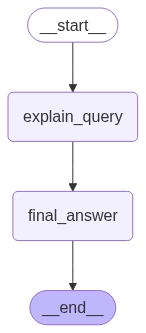

In [47]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

### YOU can make it more complicated like following the difficult task

In [48]:
# 5. Run the graph
user_query = input("Please Enter your Query here! ")
initial_input = {"messages": [HumanMessage(content=user_query)]}

final_state = app.invoke(initial_input)

# 6. Print the final answer correctly
final_answer = final_state['messages'][-1].content

print("\nFinal Answer:")
print(final_answer)
print("--" * 30)

Please Enter your Query here! what is the main difference between semi supervise learning and weak supervise learning in ML

Final Answer:
Semi-supervised learning and weakly supervised learning are both machine learning paradigms that address the challenge of limited labeled data, but they differ fundamentally in their approach.  While both leverage information beyond perfectly labeled datasets, the nature and quantity of this information distinguish them.

**Semi-supervised learning (SSL)** operates on a dataset comprised of a small amount of labeled data and a significantly larger amount of unlabeled data. The core principle of SSL is to leverage the structure inherent within the unlabeled data to improve the performance of a model trained on the limited labeled data.  The unlabeled data acts as a regularizer, guiding the model to learn a decision boundary that is both consistent with the labeled data and reflects the underlying distribution of the unlabeled data.  This is achieved 

Semi-supervised learning and weakly supervised learning are both machine learning paradigms that address the challenge of limited labeled data, but they differ fundamentally in their approach.  While both leverage information beyond perfectly labeled datasets, the nature and quantity of this information distinguish them.

**Semi-supervised learning (SSL)** operates on a dataset comprised of a small amount of labeled data and a significantly larger amount of unlabeled data. The core principle of SSL is to leverage the structure inherent within the unlabeled data to improve the performance of a model trained on the limited labeled data.  The unlabeled data acts as a regularizer, guiding the model to learn a decision boundary that is both consistent with the labeled data and reflects the underlying distribution of the unlabeled data.  This is achieved through various techniques, such as self-training, co-training, and graph-based methods, all of which aim to iteratively improve model accuracy by incorporating information from the unlabeled data while remaining consistent with the labeled examples. The assumption underlying SSL is that the unlabeled data shares the same underlying distribution as the labeled data, allowing for generalization beyond the limited labeled set.

**Weakly supervised learning (WSL)**, on the other hand, primarily utilizes labeled data, but the quality of these labels is compromised.  This imperfection can manifest in several ways:  noisy labels (incorrect classifications), incomplete labels (partial or ambiguous annotations), or imprecise labels (lack of fine-grained detail).  The challenge in WSL lies in learning an accurate model despite the inherent uncertainty and inaccuracies
------------------------------------------------------------


In [50]:


user_query = "what is the main difference between semi supervise learning and weak supervise learning in ML"
initial_input = {"messages": [HumanMessage(content=user_query)]}

print("Streaming graph execution...")
print("--" * 30)

for event in app.stream(initial_input):
    # The event key is the name of the node that just ran
    node_name = list(event.keys())[0]
    node_output = event[node_name]

    print(f"✅ Output from node: '{node_name}'")
    print(node_output)
    print("--" * 30)

    # Specifically check for the explanation step
    if node_name == "explain_query":
        explained_query_message = node_output['messages'][0]
        print("\n✨ EXPLANATION OF INITIAL QUERY ✨")
        print(explained_query_message.content)
        print("--" * 30)

Streaming graph execution...
------------------------------------------------------------
✅ Output from node: 'explain_query'
{'messages': [AIMessage(content='The main difference between semi-supervised and weakly supervised learning lies in the *type* of extra information you give the machine learning model beyond the usual labeled data.\n\n* **Semi-supervised learning:**  You have a small amount of *fully labeled* data (e.g., pictures of cats labeled "cat") and a large amount of *unlabeled* data (e.g., many more pictures of cats without labels). The model learns from both, using the labeled data to "understand" the unlabeled data.\n\n* **Weakly supervised learning:** You have a large amount of data, but the labels are *noisy*, *incomplete*, or *indirect*.  For example, you might have pictures of cats with inaccurate labels ("maybe a cat?"), or labels that are only partially descriptive ("furry animal"). The model learns to deal with these imperfect labels.\n\n\nIn short: Semi-supervi

eaming graph execution...
------------------------------------------------------------
✅ Output from node: 'explain_query'
{'messages': [AIMessage(content='The main difference between semi-supervised and weakly supervised learning lies in the *type* of extra information you give the machine learning model beyond the usual labeled data.\n\n* **Semi-supervised learning:**  You have a small amount of *fully labeled* data (e.g., pictures of cats labeled "cat") and a large amount of *unlabeled* data (e.g., many more pictures of cats without labels). The model learns from both, using the labeled data to "understand" the unlabeled data.\n\n* **Weakly supervised learning:** You have a large amount of data, but the labels are *noisy*, *incomplete*, or *indirect*.  For example, you might have pictures of cats with inaccurate labels ("maybe a cat?"), or labels that are only partially descriptive ("furry animal"). The model learns to deal with these imperfect labels.\n\n\nIn short: Semi-supervised learning uses some *perfect* labels and lots of *no labels*, while weakly supervised learning uses lots of labels that are *imperfect* in some way.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []}, id='run--e73140e2-d822-42ba-a6b1-749bb39680cb-0', usage_metadata={'input_tokens': 31, 'output_tokens': 216, 'total_tokens': 247, 'input_token_details': {'cache_read': 0}})]}
------------------------------------------------------------

✨ EXPLANATION OF INITIAL QUERY ✨
The main difference between semi-supervised and weakly supervised learning lies in the *type* of extra information you give the machine learning model beyond the usual labeled data.

* **Semi-supervised learning:**  You have a small amount of *fully labeled* data (e.g., pictures of cats labeled "cat") and a large amount of *unlabeled* data (e.g., many more pictures of cats without labels). The model learns from both, using the labeled data to "understand" the unlabeled data.

* **Weakly supervised learning:** You have a large amount of data, but the labels are *noisy*, *incomplete*, or *indirect*.  For example, you might have pictures of cats with inaccurate labels ("maybe a cat?"), or labels that are only partially descriptive ("furry animal"). The model learns to deal with these imperfect labels.


In short: Semi-supervised learning uses some *perfect* labels and lots of *no labels*, while weakly supervised learning uses lots of labels that are *imperfect* in some way.
------------------------------------------------------------
✅ Output from node: 'final_answer'
{'messages': [AIMessage(content="Semi-supervised learning and weakly supervised learning are both machine learning paradigms that leverage additional information beyond a purely supervised learning setting, where all data points are fully and accurately labeled.  However, they differ fundamentally in the *nature* of this supplementary information.\n\n**Semi-supervised learning** utilizes a training dataset composed of two distinct parts: a relatively small set of accurately labeled instances and a significantly larger set of unlabeled instances.  The labeled data provides explicit ground truth for the model to learn from, while the unlabeled data acts as a source of additional information to improve the model's generalization capabilities and robustness. The core principle is to exploit the structure inherent in the unlabeled data to improve the learning process.  This often involves techniques such as self-training, co-training, or generative models to infer labels for the unlabeled data and subsequently incorporate this inferred information into the learning process.  The quality of the labeled data is paramount; it is assumed to be perfectly accurate and representative of the underlying data distribution.  The focus lies in leveraging the abundance of unlabeled data to mitigate the limitations imposed by a scarcity of labeled examples.\n\n**Weakly supervised learning**, in contrast, uses a large amount of data with labels that are imperfect or incomplete.  The imperfection can manifest in several ways:\n\n* **Noisy labels:**  Labels may contain errors or inaccuracies, reflecting human annotation mistakes or inherent ambiguity in the data.\n* **Incomplete labels:**  Labels might be partially descriptive, missing key attributes, or only providing coarse-grained classifications", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'MAX_TOKENS', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []}, id='run--f2451a22-d70c-4f43-95a1-70d123f37a2a-0', usage_metadata={'input_tokens': 234, 'output_tokens': 312, 'total_tokens': 546, 'input_token_details': {'cache_read': 0}})]}
------------------------------------------------------------